## Observations and Insights 

In [168]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# locate data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
main_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
main_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [169]:
# set up data frame and drop duplicates
data_df2 = main_data_df.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
data_df2 = data_df2.drop_duplicates(subset=["Mouse ID"])

# Checking the number of mice.
mouse_ID_count = data_df2["Mouse ID"].count()

#print total couunt result
pd.DataFrame({'Number of Mice': [mouse_ID_count]})


,Number of Mice
0,249


In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
main_data_df = main_data_df[main_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#make an index
mouse_data = main_data_df.set_index('Mouse ID')
timepoint_data = mouse_data["Timepoint"]
mouse_summary = pd.DataFrame({'Timepoint':timepoint_data})
#print results
mouse_summary

,Timepoint
Mouse ID,
g989,0
g989,0
g989,5
g989,5
g989,10
g989,10
g989,15
g989,15
g989,20


In [155]:
# Optional: Get all the data for the duplicate mouse ID. 
#Creat a Clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_df = main_data_df[main_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#print results 
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [156]:
#make a clean dataframe            
clean_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#drop duplicates
clean_data_df = clean_data_df[clean_data_df.duplicated(subset=['Timepoint'])]
#set index
mouse_data = clean_data_df.set_index('Mouse ID')  
#print
clean_data_df
#___________________________________________________________________???????

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [171]:
# Checking the number of mice in the clean DataFrame.
mouse_data = clean_data_df.loc[:, ['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']]
#setup count and clean summary
total_count = mouse_ID_count - nunique
clean_summary_df = pd.DataFrame({'Number Of Mice': [total_count]})
#print total couunt result
clean_summary_df

,Number Of Mice
0,248


## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
import numpy as np
import scipy.stats as sts

# Demonstrate calculating measures of tumors
tumor_count =mouse_data['Tumor Volume (mm3)']
mean_numpy = np.mean(tumor_count)
print(f"The mean of tumor count is {mean_numpy}")
median_numpy = np.median(tumor_count)
print(f"The median of tumor count is {median_numpy}")
mode_scipy = sts.mode(tumor_count)
print(f"The mode of tumor count is {mode_scipy}")
print(f"----------------------------------------------------")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = main_data_df.groupby('Drug Regimen')
# Count how many times each maker appears in our group
drug_regimen_count = drug_regimen_group['Drug Regimen'].count()
drug_regimen_count

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
var_numpy = np.var(tumor_count,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")
sd_numpy = np.std(tumor_count,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")
print(f"----------------------------------------------------")

print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")
# Assemble the resulting series into a single summary dataframe.
                          
m_m_v_sd_summary = clean_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})
m_m_v_sd_summary

The mean of tumor count is 50.54444819223579
The median of tumor count is 49.00080978
The mode of tumor count is ModeResult(mode=array([45.]), count=array([249]))
----------------------------------------------------
The population variance using the NumPy module is 77.52449107840268
The population standard deviation using the NumPy module is 8.80479932073427
----------------------------------------------------
Roughly 68% of the data is between 41.74 and 59.349
Roughly 95% of the data is between 32.935 and 68.154
Roughly 99.7% of the data is between 24.13 and 76.959


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.577199  41.020724  19.660760  4.434046  0.300311
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary = mouse_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})
stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

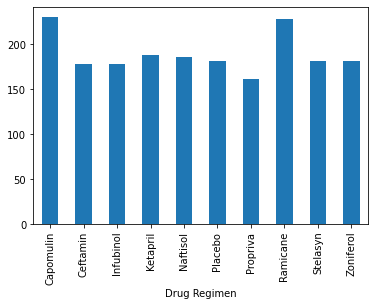

In [173]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements = clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()

measurements.plot(kind='bar')
plt.show()

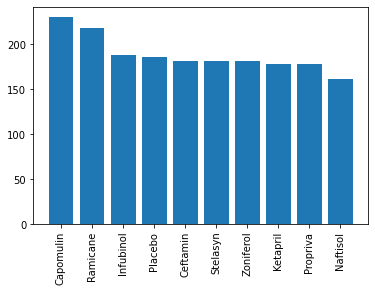

In [161]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = clean_data_df['Drug Regimen'].unique()
y_axis = clean_data_df['Drug Regimen'].value_counts()


plt.xticks(rotation='vertical')
plt.bar(x_axis, y_axis)
plt.show()

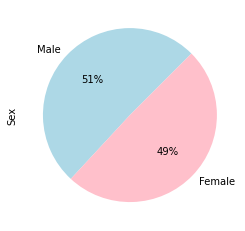

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = clean_data_df[clean_data_df.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID') 

pie_df = clean_data_df['Sex'].value_counts()
pie_df.plot(kind='pie', colors=['lightblue', 'pink'],autopct='%1.0f%%', startangle = 45)
plt.show()

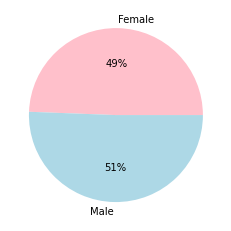

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
clean_sex_data_df = clean_data_df[clean_data_df.duplicated(subset=['Timepoint'])]
mouse_data = clean_sex_data_df.set_index('Mouse ID')   

sex = clean_data_df.groupby('Sex')['Mouse ID'].count()
labels = list(sex.index)#['Mouse ID']  
sex = sex.to_numpy()
colors = ['pink', 'lightblue']

plt.pie(sex, labels = labels, colors = colors, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [178]:
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [179]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#set index
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#last_timepoint_setup = merg_df3.set_index('Drug Regimen')
last_timepoint = clean_data_df.loc[clean_data_df['Drug Regimen'].isin(treatment_names)]
last_timepoint
#Start by getting the last (greatest) timepoint for each mouse
greatest_time = last_timepoint.groupby(['Mouse ID'])['Timepoint'].max()
#merge
last_time_df2 = pd.merge(greatest_time, last_timepoint, on=["Mouse ID", "Timepoint"])
#print results
last_time_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [183]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin/set index
treatments_df = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol =[]
# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments_df:
    df = last_time_df2.loc[last_time_df2['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(df)
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = df.loc[(df < lower_bound) | (df > upper_bound)]
    outlier_occupancy
    print(f'Drug name is - {treatment}, outliers are - {outlier_occupancy}')

Drug name is - Capomulin, outliers are - Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug name is - Ramicane, outliers are - Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug name is - Infubinol, outliers are - 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug name is - Ceftamin, outliers are - Series([], Name: Tumor Volume (mm3), dtype: float64)


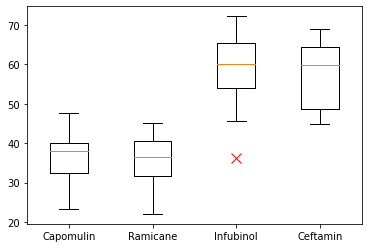

In [187]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
flierprops = dict(marker='x', markerfacecolor='r', markersize=10, markeredgecolor='red')
plt.boxplot(tumor_vol, labels=labels, flierprops=flierprops)
#plt.title('Final Volume by Regimen')
#plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

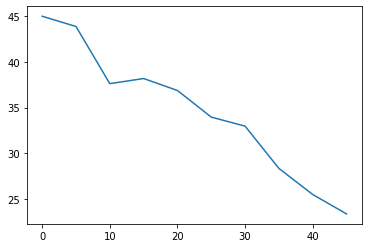

In [189]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_a = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']#[['Mouse ID', 'Timepoint']]
mouse_a
mouse_id = mouse_a.loc[mouse_a['Mouse ID'] == 's185']
plt.plot(mouse_id['Timepoint'],mouseid['Tumor Volume (mm3)'])

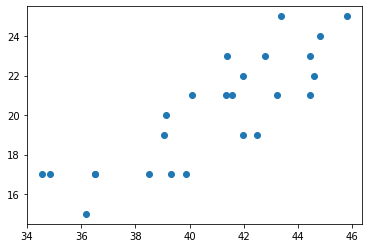

In [190]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_b = mouse_a.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merge_mouse = pd.merge(mouse_metadata, mouse_b, on='Mouse ID')
                 title = 'Average Tumor Volume (mm3) vs Mouse Weight for Capomulin Regimen')
plt.scatter(merge_mouse['Tumor Volume (mm3)'], merge_mouse['Weight (g)'])
plt.show()

## Correlation and Regression

The correlation between both facotrs is 0.84
rsquared is 0.7088568047708721


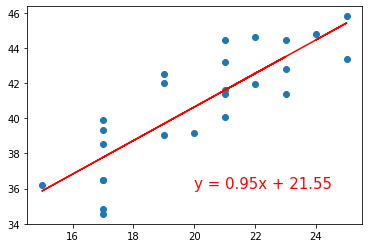

In [191]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as sts
weight = merge_mouse['Weight (g)']
tumv = merge_mouse['Tumor Volume (mm3)']
correlation = st.pearsonr(tumv, weight)
print(f"The correlation between both facotrs is {round(correlation[0],2)}")
#add liner regression
x_values = weight
y_values = tumv
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = '+ str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'rsquared is {rvalue**2}')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(20,36),fontsize=15,color='red')
plt.show()